In [1]:
# ---- Uncomment the following to run in colab, re-run this cell after installation -----
# try:
#   import decodanda
# except ImportError:
#   !pip install decodanda
#   print('\n\nInstalled Decodanda. Stopping RUNTIME. Colaboratory will restart automatically. Please run again.\n\n')
#   exit()


from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
np.random.seed(1)
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = 'w'
import warnings
warnings.filterwarnings('ignore')

from decodanda import decode_in_time, generate_synthetic_data_intime

## Decoding in time

Decodanda exposes a ``decoding_in_time`` function that can be used to see how the decoding performance of a given variable changes before and after a certain onset.

For this function to work, the ``data`` dictionary needs to include a ``time_from_onset`` attribute that contains negative and positive numbers.

Two important parameters of this function are ``time_boundaries`` and ``time_window``:
the first defines the minimum and maximum ``time_from_onset`` that are analyzed, the second defines a window of time that is used to perform each individual decoding analysis.

These two need to be expressed in the same unit of ``time_from_onset``. In the example below we will use integers as a unit, and decode from -9 to +12 around each onset.

The function will select all trials (with different ``trial`` number) that contain a ``time_from_onset`` that spans from -9 to +12, and perform a series of decoding analyses using data included in a sliding window of width=3.

7it [00:10,  1.55s/it]


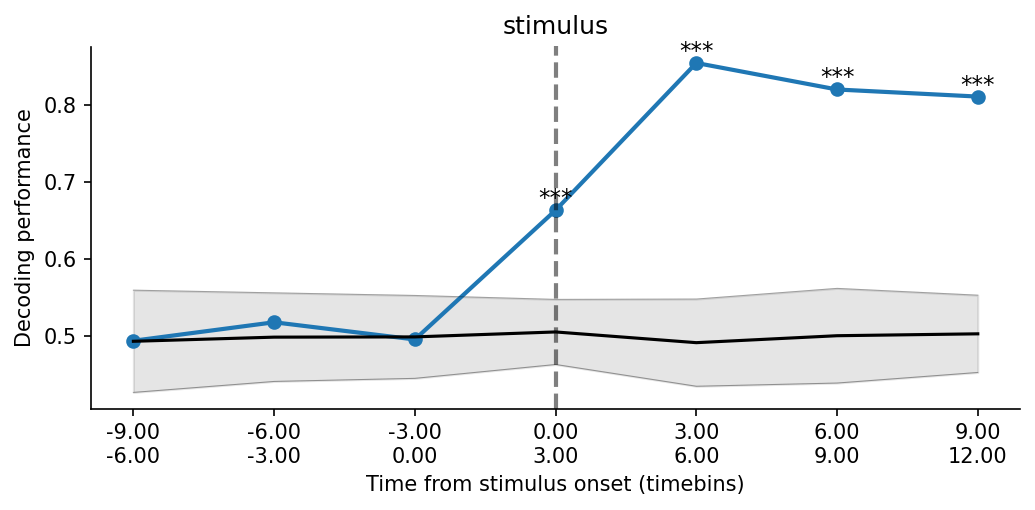

In [2]:
data = generate_synthetic_data_intime(n_neurons=100, min_time=-12, max_time=15, signal=0.2, ntrials=40)
conditions = {'stimulus': ['A', 'B']}

decodanda_params = {
    'verbose': False,
}

decoding_params = {
    'training_fraction': 0.8,
    'nshuffles': 25,
    'cross_validations': 20,
}

perfs, null, time_points = decode_in_time(data, conditions,
                               time_attr='time_from_onset',
                               time_boundaries=[-9, 12],
                               time_window=3,
                               decoding_params=decoding_params,
                               decodanda_params=decodanda_params,
                               plot=True,
                               time_key='Time from stimulus onset (timebins)')
